# Regression approach


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Data preprocessing for the given dataset

## 1. Data cleaning

### 1.1. Loading data and providing information

In [2]:
df_amazon = pd.read_csv('AMZN.csv')

In [3]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              2473 non-null   object 
 1   Open              2473 non-null   float64
 2   High              2473 non-null   float64
 3   Low               2473 non-null   float64
 4   Close(t)          2473 non-null   float64
 5   Volume            2473 non-null   int64  
 6   SD20              2473 non-null   float64
 7   Upper_Band        2473 non-null   float64
 8   Lower_Band        2473 non-null   float64
 9   S_Close(t-1)      2473 non-null   float64
 10  S_Close(t-2)      2473 non-null   float64
 11  S_Close(t-3)      2473 non-null   float64
 12  S_Close(t-5)      2473 non-null   float64
 13  S_Open(t-1)       2473 non-null   float64
 14  MA5               2473 non-null   float64
 15  MA10              2473 non-null   float64
 16  MA20              2473 non-null   float64


In [4]:
df_amazon.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,2473.000000,2473.000000,2473.000000,2473.000000,2.473000e+03,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,...,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000,2473.000000
mean,826.164590,834.746130,816.663631,826.197849,4.309489e+06,25.257533,865.297646,764.267514,824.986211,823.770396,...,113.401112,112.954962,111.653683,2098.568795,2097.680303,2094.146624,18694.046041,18687.238949,18660.280890,827.404666
std,698.038503,705.987111,689.294489,698.082871,2.417880e+06,29.641950,730.285700,638.652752,696.627602,695.169032,...,52.643302,52.248810,51.174082,596.210304,595.946837,594.947984,5129.355628,5128.307884,5124.540611,699.515103
min,157.840000,159.870000,156.570000,157.780000,8.813000e+05,2.454017,164.124849,148.681227,157.780000,155.530000,...,45.335000,44.828000,42.630200,1099.230000,1099.230000,1099.230000,10655.300000,10655.300000,10655.300000,157.780000
25%,266.810000,269.480000,263.850000,266.490000,2.755800e+06,6.951115,277.869989,253.212633,266.410000,266.380000,...,63.835000,63.633500,62.854000,1562.170000,1560.700000,1556.220000,14567.170000,14565.250000,14539.140000,266.560000
50%,528.520000,534.560000,521.400000,529.420000,3.686200e+06,13.908356,558.160917,472.483684,529.000000,527.460000,...,102.697000,102.748500,102.633400,2067.030000,2066.960000,2066.130000,17716.050000,17712.660000,17705.910000,529.440000
75%,1445.000000,1459.780000,1415.020000,1442.840000,5.070300e+06,31.115370,1552.733137,1334.556935,1441.500000,1437.820000,...,157.845000,157.894500,158.643600,2639.440000,2639.400000,2636.780000,23924.980000,23909.840000,23860.460000,1447.340000
max,3251.060000,3344.290000,3165.430000,3225.000000,2.413420e+07,205.254540,3321.751870,2948.254283,3225.000000,3225.000000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,3225.000000


In [5]:
df_amazon.describe()

Index(['Date', 'Open', 'High', 'Low', 'Close(t)', 'Volume', 'SD20',
       'Upper_Band', 'Lower_Band', 'S_Close(t-1)', 'S_Close(t-2)',
       'S_Close(t-3)', 'S_Close(t-5)', 'S_Open(t-1)', 'MA5', 'MA10', 'MA20',
       'MA50', 'MA200', 'EMA10', 'EMA20', 'EMA50', 'EMA100', 'EMA200', 'MACD',
       'MACD_EMA', 'ATR', 'ADX', 'CCI', 'ROC', 'RSI', 'William%R', 'SO%K',
       'STD5', 'ForceIndex1', 'ForceIndex20', 'Date_col', 'Day', 'DayofWeek',
       'DayofYear', 'Week', 'Is_month_end', 'Is_month_start', 'Is_quarter_end',
       'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year',
       'Year', 'Month', 'QQQ_Close', 'QQQ(t-1)', 'QQQ(t-2)', 'QQQ(t-5)',
       'QQQ_MA10', 'QQQ_MA20', 'QQQ_MA50', 'SnP_Close', 'SnP(t-1))',
       'SnP(t-5)', 'DJIA_Close', 'DJIA(t-1))', 'DJIA(t-5)', 'Close_forcast'],
      dtype='object')

In [6]:
df_amazon.shape

(2473, 64)

### 1.2. Handling null values

In [7]:
df_amazon.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close(t)         0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 64, dtype: int64

In [8]:
df_amazon.isnull().any().any()
print('There is no null values.')

There is no null values.


### 1.3. Dropping irrelevant columns

In [9]:
# Dropped date columns as they are of object datatype

X=df_amazon.iloc[:,0:62] #independent columns
cols = [0, 36]
X.drop(X.columns[cols], axis=1, inplace=True)
y=df_amazon.iloc[:,-1] #target variable

### 1.4. Handling outliers using z-scores

In [10]:
z_scores = zscore(X)
data_no_outliers = X[(np.abs(z_scores) < 3).all(axis=1)]

In [11]:
if data_no_outliers.empty:
    print("\nNo outliers detected.")
else:
    print("\nData without outliers:")
    print(data_no_outliers)


No outliers detected.


## 2. Data transformation

### 2.1. Feature scaling 

In [12]:
# Scaling all the features and the target variable as well
scaler_features = StandardScaler()
scaler_target = StandardScaler()

X_scaled = scaler_features.fit_transform(X)
y_scaled = scaler_target.fit_transform(y.values.reshape(-1, 1)).flatten()

## 3. Data splitting

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=26)

# Creating a model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

## 4. Initial model evaluation

In [14]:
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model

# Average difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Measure of how well the model explains variance in target variable
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")
print("The values of MSE and R-squared denotes that the model performs well.")

Model Performance
Mean Squared Error (MSE): 0.0013
R-squared (R2): 0.9988
The values of MSE and R-squared denotes that the model performs well.


## 5. Feature engineering

### 5.1. Using of Extra Trees Regressor for selecting important features

In [15]:

model = ExtraTreesRegressor(random_state=7)
model.fit(X,y)

ExtraTreesRegressor(random_state=7)

In [16]:
print(model.feature_importances_)

[8.20325588e-02 6.97766303e-02 6.42448255e-02 5.58417323e-02
 3.28178157e-05 2.88730375e-05 1.24714213e-02 2.45443340e-02
 1.99137247e-02 4.53255534e-02 4.51340582e-02 2.67359737e-02
 4.91424179e-02 5.52984709e-02 4.51918276e-02 4.19093439e-02
 2.90557584e-02 1.01383054e-02 4.90380881e-02 5.71104926e-02
 6.63743456e-02 6.50353242e-02 3.84674851e-02 3.01384339e-05
 2.34958338e-05 3.87299647e-05 2.64046846e-05 0.00000000e+00
 2.71329559e-05 2.53095166e-05 4.12982474e-05 3.93779436e-05
 3.29420875e-05 3.15322091e-05 3.21910784e-05 1.91563137e-05
 3.18093337e-05 3.90271538e-04 6.46335753e-04 8.18502561e-06
 5.12771093e-06 2.84952286e-06 1.77280420e-06 5.50568766e-07
 0.00000000e+00 3.57665439e-06 8.18646805e-03 4.80465415e-04
 7.69380238e-04 8.38753209e-03 2.35456998e-04 8.27722882e-03
 7.57482138e-04 1.67499100e-02 1.01433054e-03 1.24480208e-04
 2.93832875e-04 1.31118818e-04 1.30339278e-04 1.59423813e-04]


### 5.2. Plotting the graph of selected features

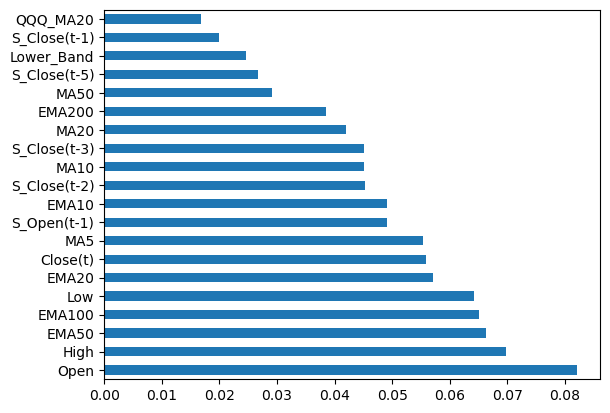

In [17]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

### 5.3. Revealing the model with features of highest importance

In [18]:
X = X[['Open', 'High', 'Low', 'EMA50','EMA100','EMA20','Close(t)','MA5',
       'S_Open(t-1)','EMA10','MA10','MA20','EMA200','MA50','Lower_Band', 
       'S_Close(t-2)',  'S_Close(t-3)','S_Close(t-5)', 'S_Close(t-1)',
       'QQQ_MA20']]

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2473 entries, 0 to 2472
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2473 non-null   float64
 1   High          2473 non-null   float64
 2   Low           2473 non-null   float64
 3   EMA50         2473 non-null   float64
 4   EMA100        2473 non-null   float64
 5   EMA20         2473 non-null   float64
 6   Close(t)      2473 non-null   float64
 7   MA5           2473 non-null   float64
 8   S_Open(t-1)   2473 non-null   float64
 9   EMA10         2473 non-null   float64
 10  MA10          2473 non-null   float64
 11  MA20          2473 non-null   float64
 12  EMA200        2473 non-null   float64
 13  MA50          2473 non-null   float64
 14  Lower_Band    2473 non-null   float64
 15  S_Close(t-2)  2473 non-null   float64
 16  S_Close(t-3)  2473 non-null   float64
 17  S_Close(t-5)  2473 non-null   float64
 18  S_Close(t-1)  2473 non-null 

## 6. Model selection

### 6.1. Scaling and splitting the selected features

In [20]:
X_scaled = scaler_features.fit_transform(X)

In [21]:

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=26)

### 6.2.1 Model 1: Linear Regression

In [22]:
# Creating a model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model

# Average difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Measure of how well the model explains variance in target variable
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance
Mean Squared Error (MSE): 0.0012
R-squared (R2): 0.9988


### 6.2.2. Hyperparameter tuning using Grid Search CV

In [23]:
# Define the hyperparameters to be tuned
hyperparameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
                    }

# Perform grid search cross-validation
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best hyperparameters: {'copy_X': True, 'fit_intercept': False}


### 6.2.3. Model after using hyperparameter tuning

In [24]:
model = LinearRegression(fit_intercept=False,copy_X=True)

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model

# Average difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Measure of how well the model explains variance in target variable
r2 = r2_score(y_test, y_pred)

print("Model Performance after tuning")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance after tuning
Mean Squared Error (MSE): 0.0012
R-squared (R2): 0.9988


### 6.2.4. Visualization of the actual and predicted values

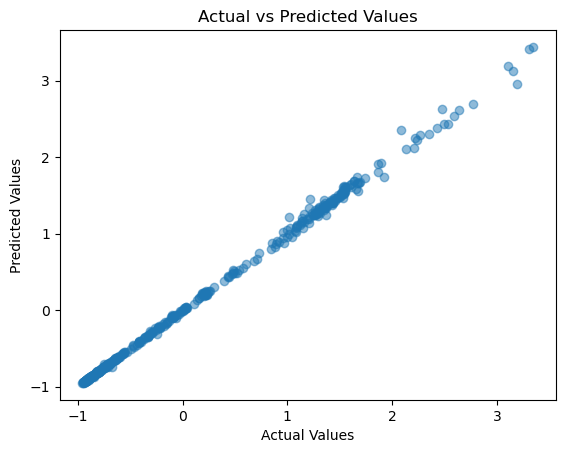

In [25]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### Here, the plot shows the actual and predicted values in a single line. This shows the model is making accurate predictions.

### 6.3.1. Model 2: Support Vector Machine (SVM)

In [26]:
# Initialize SVM regression model
svm_regressor = SVR() # You can choose a different kernel based on your data

# Train the SVM model using the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions_svm = svm_regressor.predict(X_test)

# Evaluate the SVM model (use appropriate metrics based on your regression problem)
from sklearn.metrics import mean_squared_error, r2_score

mse_svm = mean_squared_error(y_test, predictions_svm)
r2_svm = r2_score(y_test, predictions_svm)

print('Model Performance')
print("SVM Mean Squared Error:", mse_svm)
print("SVM R-squared:", r2_svm)

Model Performance
SVM Mean Squared Error: 0.002252721376394206
SVM R-squared: 0.9978356973753884


### 6.3.2. Hyperparameter tuning

In [27]:
# Define the hyperparameters and their respective values to be tuned
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale', 'auto']
}

# Initialize the SVM regression model
svm_regressor = SVR()

# Perform Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svm_regressor, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'linear'}


### 6.3.3. Model after using hyperparameter tuning

In [28]:
# Initialize SVM regression model
svm_regressor = SVR(C= 10, gamma= 0.1, kernel='linear') # You can choose a different kernel based on your data

# Train the SVM model using the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions_svm = svm_regressor.predict(X_test)

# Evaluate the SVM model (use appropriate metrics based on your regression problem)
from sklearn.metrics import mean_squared_error, r2_score

mse_svm = mean_squared_error(y_test, predictions_svm)
r2_svm = r2_score(y_test, predictions_svm)


print('Model Performance after tuning')
print("SVM Mean Squared Error:", mse_svm)
print("SVM R-squared:", r2_svm)

Model Performance after tuning
SVM Mean Squared Error: 0.0016227509946044438
SVM R-squared: 0.9984409415769228


### 6.3.4. Visualization of the actual and predicted values

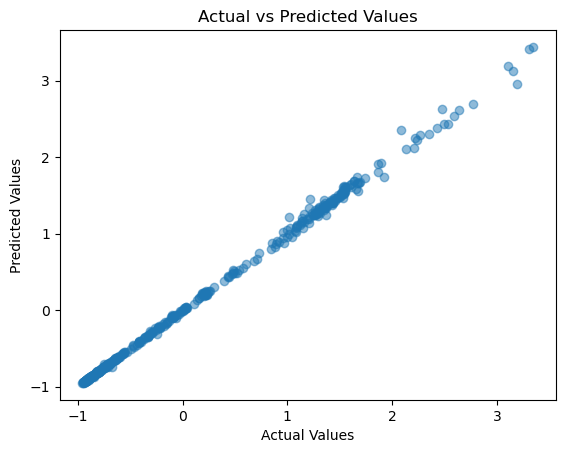

In [29]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### 6.4.1. Model 3: Random Forest Regression

In [30]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model performance")
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Model performance
Mean Squared Error: 0.0011397428577025839
R-Squared: 0.9989049917650018


### 6.4.2. Hyperparameter tuning

In [31]:
# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1  # Use parallel processing, adjust as needed based on your system capabilities
)

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

print(f'Best Hyperparameters: {best_params}')

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


### 6.4.3. Model after hyperparameter tuning

In [32]:
params = {'max_depth': 10, 'min_samples_leaf': 2,
          'min_samples_split': 5, 'n_estimators': 50,
          'random_state': 42}

rf_regressor = RandomForestRegressor(**params)
# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print('Model Performance after tuning')
print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Model Performance after tuning
Mean Squared Error: 0.001176760169128926
R-Squared: 0.9988694273738101


### 6.4.4. Visualization of the actual vs predicted values

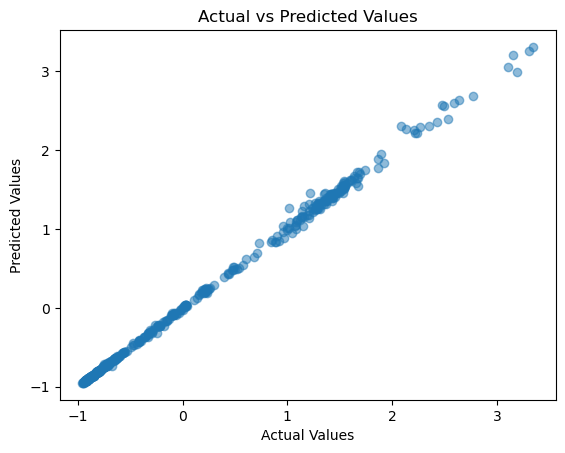

In [33]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### Here, the plot shows the actual and predicted values in a single line. This shows the model is making accurate predictions as it is closely aligned with the diagonal line.

### 6.5.1. Model 4 : Decision tree regressor

In [34]:
# Create a Decision Tree Regressor object
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f'Decision Tree Mean Squared Error: {mse_dt}')
print(f'Decision Tree R-Squared: {r2_dt}')

Decision Tree Mean Squared Error: 0.0020126325909587814
Decision Tree R-Squared: 0.9980663627359175


### 6.5.2. Hyperparameter tuning

In [35]:
# Define the hyperparameters and their possible values
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree Regressor object
dt_regressor = DecisionTreeRegressor(random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the Grid Search to the data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by Grid Search
print("Best Hyperparameters: ", grid_search.best_params_)

# Make predictions using the best model
best_dt_regressor = grid_search.best_estimator_
y_pred_best_dt = best_dt_regressor.predict(X_test)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}


### 6.5.3. Model after hyperparameter tuning


In [36]:
params = {'max_depth': 10, 'min_samples_leaf': 2, 
          'min_samples_split': 10}

dt_regressor = DecisionTreeRegressor(**params)
# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)


print('Model Performance after tuning')
print(f'Mean Squared Error: {mse_dt}')
print(f'R-Squared: {r2_dt}')

Model Performance after tuning
Mean Squared Error: 0.0018797595425072058
R-Squared: 0.9981940205503802


### 6.5.4. Visualization of actual vs predicted values

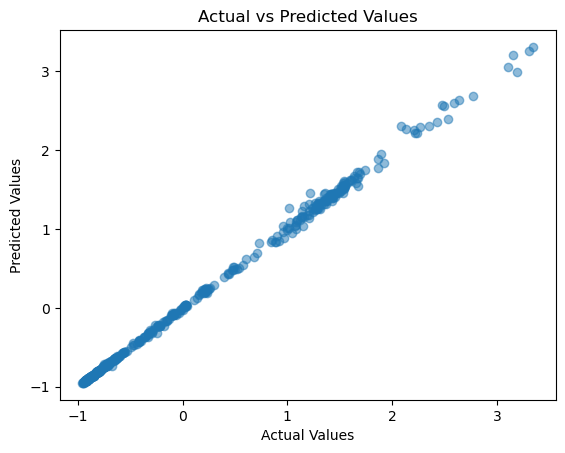

In [37]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


### Depending on the value of Mean Squared Error and R-squared, we can deduce that the Random Forest Algorithm is better than Support Vector Machine, Linear regression and Decision Tree Algorithms.

## 7. Equation evaluated from linear regression model

In [38]:
coefficients = model.coef_
coefficients

array([-5.14415542e-01,  3.97803532e-01,  2.91661766e-01, -8.37387983e-02,
       -8.37387983e-02, -8.37387983e-02,  8.16431145e-01,  1.12757801e-01,
        7.29777478e-02, -8.37387983e-02,  6.35641885e-02,  3.90992856e-02,
       -8.37387983e-02, -3.44015737e-03, -2.84818482e-03, -1.35042601e-01,
        1.03554883e-01, -1.76498671e-02,  1.93627669e-01,  6.29475516e-04])

In [39]:
intercept = model.intercept_

In [40]:
feature_names = ['Open', 'High', 'Low', 'EMA50','EMA100','EMA20','Close(t)','MA5',
       'S_Open(t-1)','EMA10','MA10','MA20','EMA200','MA50','Lower_Band', 
       'S_Close(t-2)',  'S_Close(t-3)','S_Close(t-5)', 'S_Close(t-1)', 'QQQ_MA20']

# Printing the equation for the linear regression model
equation = 'Close_forcast='
for i in range(len(coefficients)):
    equation += f'({round(coefficients[i], 2)} * {feature_names[i]}) + '
equation += f'{round(model.intercept_, 2)}'
equation = equation.replace('+ -', '- ')  # Correcting the signs
print(equation)

Close_forcast=(-0.51 * Open) + (0.4 * High) + (0.29 * Low) + (-0.08 * EMA50) + (-0.08 * EMA100) + (-0.08 * EMA20) + (0.82 * Close(t)) + (0.11 * MA5) + (0.07 * S_Open(t-1)) + (-0.08 * EMA10) + (0.06 * MA10) + (0.04 * MA20) + (-0.08 * EMA200) + (-0.0 * MA50) + (-0.0 * Lower_Band) + (-0.14 * S_Close(t-2)) + (0.1 * S_Close(t-3)) + (-0.02 * S_Close(t-5)) + (0.19 * S_Close(t-1)) + (0.0 * QQQ_MA20) + 0.0


## Testing our model on facebook dataset

## 1. Data cleaning

### 1.1. Loading data and providing information

In [41]:
df=pd.read_csv('FB.csv')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1215 non-null   object 
 1   Open              1215 non-null   float64
 2   High              1215 non-null   float64
 3   Low               1215 non-null   float64
 4   Close(t)          1215 non-null   float64
 5   Volume            1215 non-null   int64  
 6   SD20              1215 non-null   float64
 7   Upper_Band        1215 non-null   float64
 8   Lower_Band        1215 non-null   float64
 9   S_Close(t-1)      1215 non-null   float64
 10  S_Close(t-2)      1215 non-null   float64
 11  S_Close(t-3)      1215 non-null   float64
 12  S_Close(t-5)      1215 non-null   float64
 13  S_Open(t-1)       1215 non-null   float64
 14  MA5               1215 non-null   float64
 15  MA10              1215 non-null   float64
 16  MA20              1215 non-null   float64


In [43]:
df.describe()

,Open,High,Low,Close(t),Volume,SD20,Upper_Band,Lower_Band,S_Close(t-1),S_Close(t-2),...,QQQ_MA10,QQQ_MA20,QQQ_MA50,SnP_Close,SnP(t-1)),SnP(t-5),DJIA_Close,DJIA(t-1)),DJIA(t-5),Close_forcast
count,1215.000000,1215.000000,1215.000000,1215.000000,1.215000e+03,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,...,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000,1215.000000
mean,161.260872,163.025062,159.464782,161.352206,2.193150e+07,4.775727,169.655129,150.552220,161.216123,161.079646,...,156.539610,155.857235,153.915699,2592.825712,2591.714955,2587.274206,22936.311547,22927.459720,22892.343934,161.486938
std,35.907687,36.455796,35.470869,36.002395,1.378257e+07,3.256429,38.469932,32.725619,35.936717,35.876491,...,40.123706,39.579734,38.073895,375.572982,375.257988,374.159815,3592.855125,3593.872478,3598.948369,36.069639
min,92.830000,95.000000,89.370000,94.160000,5.913100e+06,0.719126,97.858871,85.940276,94.160000,94.070000,...,94.866000,96.542500,98.764000,1829.080000,1829.080000,1829.080000,15660.180000,15660.180000,15660.180000,94.160000
25%,129.175000,129.980000,128.245000,129.150000,1.367310e+07,2.424704,133.066481,123.944955,129.060000,129.020000,...,116.515500,115.552250,114.285700,2264.485000,2263.740000,2260.245000,19847.825000,19838.545000,19812.250000,129.300000
50%,166.010000,168.340000,164.200000,166.290000,1.842240e+07,4.124414,175.253308,154.833256,166.280000,166.080000,...,158.698000,158.633500,159.399400,2647.580000,2644.690000,2642.220000,24065.590000,24033.360000,23979.100000,166.320000
75%,184.915000,186.830000,183.420000,185.345000,2.475265e+07,6.059513,195.254473,173.346231,185.315000,185.305000,...,182.930500,182.923250,181.715800,2878.290000,2878.125000,2874.625000,25886.695000,25884.630000,25863.730000,185.370000
max,268.040000,278.890000,263.430000,268.440000,1.698037e+08,20.436283,272.146187,229.090179,268.440000,268.440000,...,270.255000,265.454000,255.044600,3386.150000,3386.150000,3386.150000,29551.420000,29551.420000,29551.420000,268.440000


### 1.2. Handling null values

In [44]:
df.isnull().sum()

Date             0
Open             0
High             0
Low              0
Close(t)         0
                ..
SnP(t-5)         0
DJIA_Close       0
DJIA(t-1))       0
DJIA(t-5)        0
Close_forcast    0
Length: 64, dtype: int64

In [45]:
df.isnull().any().any()
print('No null values.')

No null values.



### 1.3. Dropping irrelevant columns

In [46]:
# Dropped date columns as they are of object datatype

X=df.iloc[:,0:62] #independent columns
cols = [0, 36]
X.drop(X.columns[cols], axis=1, inplace=True)
y=df.iloc[:,-1] #target variable

### 1.4. Handling outliers using z-scores

In [47]:
import numpy as np
from scipy.stats import zscore
z_scores = zscore(X)
data_no_outliers = X[(np.abs(z_scores) < 3).all(axis=1)]

In [48]:
if data_no_outliers.empty:
    print("\nNo outliers detected.")
else:
    print("\nData without outliers:")
    print(data_no_outliers)


No outliers detected.


## 2. Data transformation

### 2.1. Feature scaling

In [49]:
from sklearn.preprocessing import StandardScaler

# Scaling all the features and the target variable as well
scaler_features = StandardScaler()
scaler_target = StandardScaler()

X_scaled = scaler_features.fit_transform(X)
y_scaled = scaler_target.fit_transform(y.values.reshape(-1, 1)).flatten()

## 3. Data splitting

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=26)

# Creating a model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

## 4. Initial model evaluation

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

# Evaluating the model

# Average difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Measure of how well the model explains variance in target variable
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance
Mean Squared Error (MSE): 0.0084
R-squared (R2): 0.9908


## 5. Feature engineering

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=7)
model.fit(X,y)

ExtraTreesRegressor(random_state=7)

In [53]:
print(model.feature_importances_)

[8.23353616e-02 5.28396712e-02 9.36443562e-02 1.04906169e-01
 6.07175899e-04 2.11528169e-04 3.66110408e-02 1.51455499e-03
 2.85016454e-02 3.39133319e-02 1.56247548e-02 1.37967571e-02
 3.98783029e-02 7.40285123e-02 4.45521850e-02 2.87008202e-03
 7.13272210e-03 2.17249109e-03 6.14268092e-02 5.06113037e-02
 7.97603759e-02 6.07395063e-02 8.59808251e-02 2.13778539e-04
 2.74586666e-04 3.51772966e-04 3.29896242e-04 0.00000000e+00
 1.94847246e-04 2.15213474e-04 2.66186699e-04 2.50001192e-04
 3.11260211e-04 3.56677296e-04 4.11983089e-04 2.63226760e-04
 1.61418763e-04 2.94774783e-04 3.25977927e-04 1.14418501e-04
 2.79796524e-05 9.06874595e-06 9.81260529e-06 2.16157997e-06
 0.00000000e+00 2.16485795e-04 1.11406558e-04 5.36465633e-04
 9.53773219e-03 3.78918178e-03 8.10671452e-04 1.89433197e-03
 1.76606674e-04 1.71640382e-03 7.63032334e-04 2.59987814e-04
 9.09935947e-04 8.45996488e-04 1.89123545e-04 1.98132312e-04]


### 5.2. Plotting the graph of the selected features

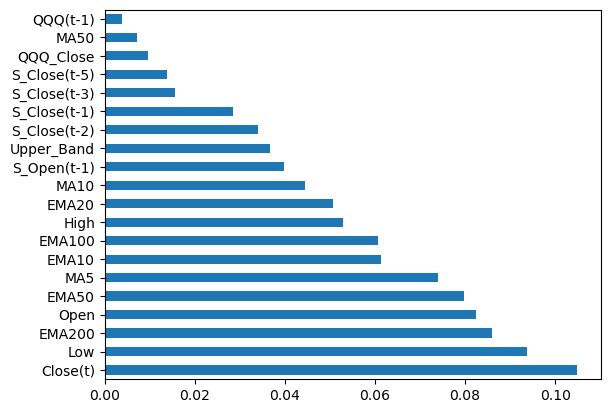

In [54]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [55]:
X=X[['QQQ(t-1)','MA50','QQQ_Close','S_Close(t-5)','S_Close(t-3)','S_Close(t-1)',
    'S_Close(t-2)','Upper_Band','S_Open(t-1)','MA10','EMA20','High','EMA100',
    'EMA10','MA5','EMA50','Open','EMA200','Low','Close(t)']]

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 0 to 1214
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   QQQ(t-1)      1215 non-null   float64
 1   MA50          1215 non-null   float64
 2   QQQ_Close     1215 non-null   float64
 3   S_Close(t-5)  1215 non-null   float64
 4   S_Close(t-3)  1215 non-null   float64
 5   S_Close(t-1)  1215 non-null   float64
 6   S_Close(t-2)  1215 non-null   float64
 7   Upper_Band    1215 non-null   float64
 8   S_Open(t-1)   1215 non-null   float64
 9   MA10          1215 non-null   float64
 10  EMA20         1215 non-null   float64
 11  High          1215 non-null   float64
 12  EMA100        1215 non-null   float64
 13  EMA10         1215 non-null   float64
 14  MA5           1215 non-null   float64
 15  EMA50         1215 non-null   float64
 16  Open          1215 non-null   float64
 17  EMA200        1215 non-null   float64
 18  Low           1215 non-null 

# 6. Model selection and evaluation

### 6.1. Random Forest Regression

In [57]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-Squared: {r2}')


Mean Squared Error: 0.01007227665066146
R-Squared: 0.9889718285075056


### 6.2. Linear regression

In [58]:
from sklearn.metrics import mean_squared_error, r2_score

# Creating a model
model = LinearRegression()

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model

# Average difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Measure of how well the model explains variance in target variable
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance
Mean Squared Error (MSE): 0.0084
R-squared (R2): 0.9908


### The performance after feature selection was same so the features removed may not be relevant for the dataset and didn't alter the performance.

### 6.2.1. Hyperparameter tuning for Linear Regression

In [59]:
from sklearn.model_selection import GridSearchCV
# Define the hyperparameters to be tuned
hyperparameters = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, -1],
                    }

# Perform grid search cross-validation
grid_search = GridSearchCV(model, hyperparameters, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

Best hyperparameters: {'copy_X': True, 'fit_intercept': False, 'n_jobs': None}


### 6.2.2. Model after hyperparameter tuning

In [60]:
params= {'copy_X': True, 'fit_intercept': False, 'n_jobs': None}

model = LinearRegression(**params)

# Training the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model

# Average difference between actual and predicted values
mse = mean_squared_error(y_test, y_pred)

# Measure of how well the model explains variance in target variable
r2 = r2_score(y_test, y_pred)

print("Model Performance")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R2): {r2:.4f}")

Model Performance
Mean Squared Error (MSE): 0.0084
R-squared (R2): 0.9908


### The model doesnot change the value of Mean Squared Error and R-squared so the default parameters were optimum for the models performance.


### 6.3. Support Vector Machines

In [61]:
from sklearn.svm import SVR

# Initialize SVM regression model
svm_regressor = SVR() # You can choose a different kernel based on your data

# Train the SVM model using the training data
svm_regressor.fit(X_train, y_train)

# Make predictions on the test data
predictions_svm = svm_regressor.predict(X_test)

# Evaluate the SVM model (use appropriate metrics based on your regression problem)
from sklearn.metrics import mean_squared_error, r2_score

mse_svm = mean_squared_error(y_test, predictions_svm)
r2_svm = r2_score(y_test, predictions_svm)

print("SVM Mean Squared Error:", mse_svm)
print("SVM R-squared:", r2_svm)

SVM Mean Squared Error: 0.025697406944639095
SVM R-squared: 0.9718638178311668
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=5; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[C

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=10; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2; total tim

### From the values of Mean Squared Error and R-squared, we can deduce that the model suitable for the given dataset is Linear Regression. Since the data performed well and gave same results before and after tuning, we can conclude the relationships within the data were linear and straightforward.

### The equation from the linear regression model is the same for this dataset as well.